## Economic Data Analysis with Fred
Fred is an economic data website which include a varity of data sources; it's all time series data, financial, and economic data.

In [3]:
!pip install fredapi

In [689]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
fred_key = 'f4c29274fe165a21c4e8b1873668b9c3'

In [31]:
# 1. Create the Fred Object

In [691]:
fred = Fred(api_key=fred_key)

In [37]:
# 2. search for economic data!

In [707]:
sp_search = fred.search('S&P',order_by='popularity')

In [708]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2025-02-25   2025-02-25   
CSUSHPINSA          CSUSHPINSA     2025-02-25   2025-02-25   
SP500                    SP500     2025-02-25   2025-02-25   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2025-02-25   2025-02-25   
BAMLC0A0CM          BAMLC0A0CM     2025-02-25   2025-02-25   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2025-02-24  Daily, Close   
CSUSHPINSA            1987-01-01      2024-12-01       Monthly   
SP500                 2015-02-25      2025-02-24  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2025-02-24  Daily, Close   
BAMLC0A0CM            1996-12-31      2025-02-24  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2025-02-25 09:19:12-06:00         92   
CSUSHPINSA      2025-02-25 08:11:20-06:00         88   
SP500           2025-02-24 19:11:50-06:00         83   
BAMLH0A0HYM2EY  2025-02-25 09:19:15-06:00         82   
BAMLC0A0CM      2025-02-25 09:25:02-06:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

In [709]:
# 3. Pull Raw Data and Plot

In [710]:
sp500 = fred.get_series(series_id='SP500')

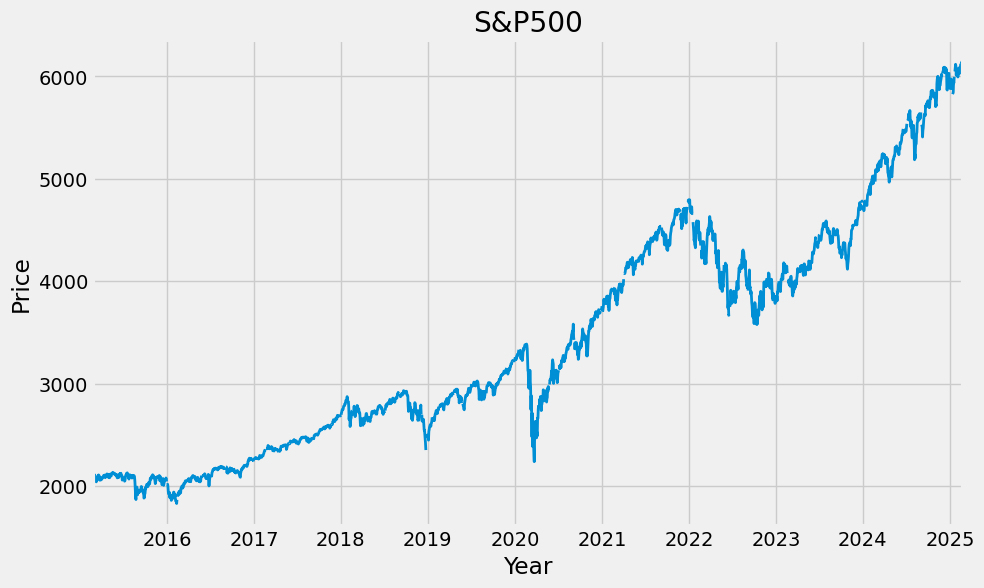

In [548]:
ax = sp500.plot(figsize= (10,6), title ='S&P500',lw=2)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

In [128]:
#4. Pull and Join Multiple Data Series

In [715]:
uemp_results = fred.search('unemployment')

In [716]:
uemp_rate = fred.get_series(series_id='UNRATE')
uemp_rate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

In [209]:
#uemp_rate.plot()

In [943]:
#ssearch for unemployment rate data for states 
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.shape

(158, 15)

In [521]:
#unemp_df['title']

In [1132]:
#Unemployment data frame "unemp_df"
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df.loc[~unemp_df['id'].str.contains('LNS')]
unemp_df = unemp_df.loc[~unemp_df['id'].str.contains('LRU')]
unemp_df = unemp_df.loc[~unemp_df['id'].str.contains('LAS')]
unemp_df = unemp_df.loc[~unemp_df['id'].str.contains('LRH')]


In [1134]:
#Go through each of the ID's and pull the series data down
#len(unemp_df.index)
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [724]:
#type(all_results)

list

In [752]:
#all_results[5]

In [1135]:
# Change the id to the actual state name 
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict

In [1137]:
uemp_states = pd.concat(all_results, axis=1).drop(['UNRATE', 'U2RATE','CSOUUR', 'CNERUR',\
                                                   'CWSTUR', 'CNEWUR','CMWRUR' ], axis = 1)
# drop rows with null values
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [593]:
# Check niull values
#uemp_states.isna().sum(axis=1).plot()

In [1138]:
uemp_states = uemp_states.rename(columns={'the District of Columbia' : 'District of Columbia'})

In [1139]:
# Plot States Unemployment Rate
px.line(uemp_states)

## Pull April 2020 Unemployment Rate per State


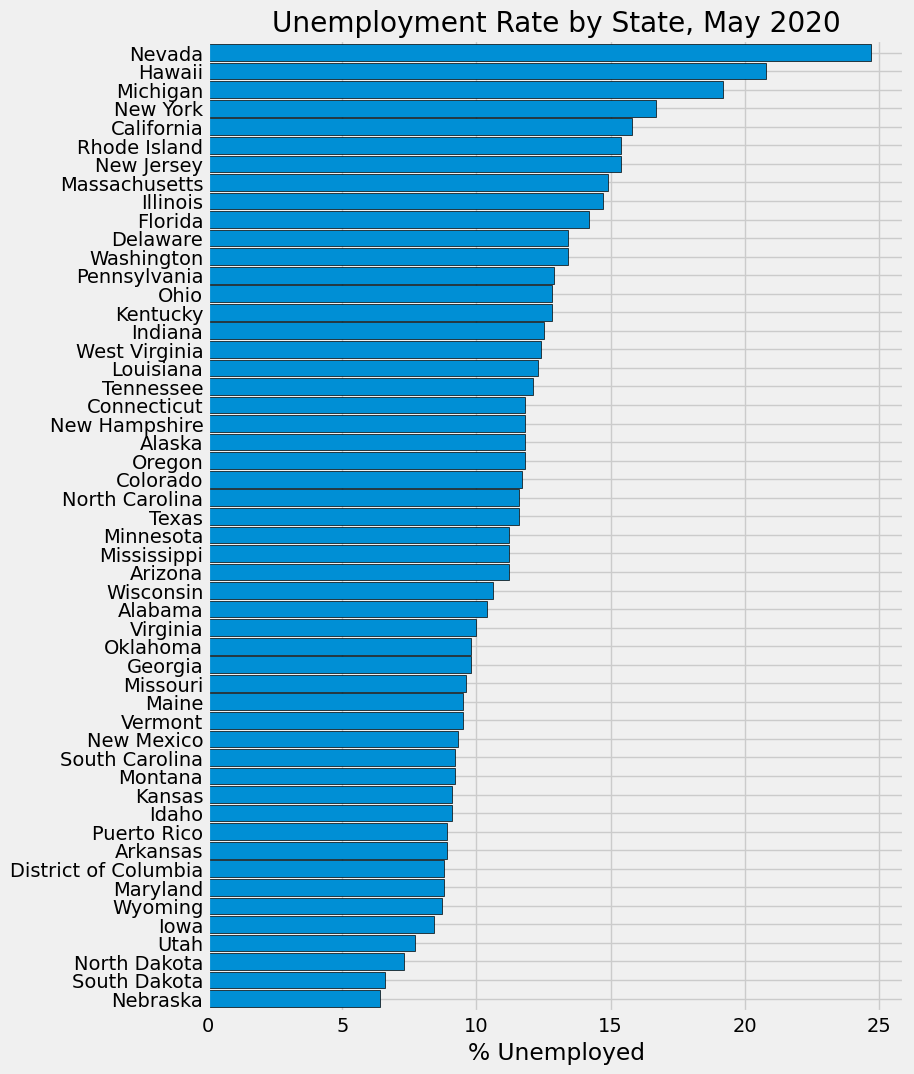

In [1145]:
ax=uemp_states.loc[uemp_states.index == '2020-05-01'].T\
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), width=0.9, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

#Pull the Participation Rate

In [1147]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [1148]:
#keep only the participation rate for the states
part_df = part_df.loc[part_df['id'].str.contains('LBS')]
#Create dictionary to map the name of the states to use later for plots
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
#combine the all results for the participation rates
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis=1)

In [1150]:
#rename the columns
part_states.columns = [part_id_to_state[c] for c in part_states.columns]
#part_states.columns

In [1127]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex = True)
axs = axs.flatten()

i = 0
for state in part_states.columns:
    if state == "District Of Columbia":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index <2022')[state]\
        .plot(ax=axs[i], label = 'Unemployment')
    part_states.query('index >=2020 and index <2022')[state]\
        .plot(ax=ax2, label ='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()